## Exercise 8.1
After installing R and restarting your jupyter notebook, the following code will run the R program.

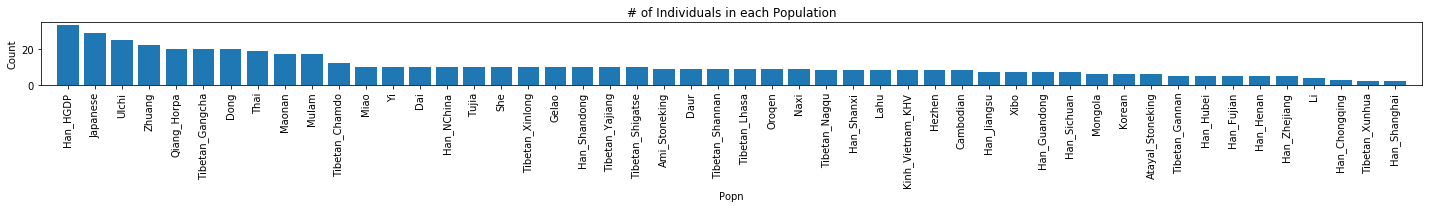

In [2]:
##Exercise 8.1B

import subprocess as sp
import collections
import matplotlib.pyplot as plt

pD="/Users/melyang/Desktop/PythonBootcamp2017/solutions/"
mycommand="Rscript {0}plotPcaFromSmartpca.R {0}modernEastAsian.pca.evec {0}modernEastAsian.pca.megaGroup 8 modernEastAsian".format(pD)
a = sp.Popen( mycommand.split(), stdout=sp.PIPE, stderr=sp.PIPE ) 
res=a.communicate()

mypopncounts=[]
for myline in res[0].split('\n'): 
    myline=''.join([i for i in myline if i != "\""])
    x=myline.split()
    if len(x)!=15: continue
    mypopncounts.append(x[1])

mypopncounts = collections.Counter(mypopncounts)
mypopncounts=mypopncounts.most_common()

xlabels=[i[0] for i in mypopncounts]
y=[i[1] for i in mypopncounts]
x=range(len(mypopncounts))

fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(1, 1, 1)

ax.bar(x,y,align='center')
ax.set_xlim(-1,len(xlabels))
ax.set_xticks(x)
ax.set_xticklabels(xlabels,rotation=90)

ax.set_xlabel("Popn")
ax.set_ylabel("Count")
ax.set_title("# of Individuals in each Population")

plt.tight_layout()
plt.show()

In [4]:
##Exercise 8.1C
from IPython.display import IFrame
IFrame("modernEastAsian.pdf", width=600, height=300)

### Exercise 8.2

In [29]:
import numpy as np

## Exercise 8.2A
def divide(myary):
    return myary/1.5

oldary=np.array(range(10),dtype=float)
print "Exercise 8.2A"
print oldary
print divide(oldary)
print

## Exercise 8.2B
def greaterthan1SD(myary):
    mean=randary.mean()
    std=randary.std()
    return list(myary[abs(myary)>(mean+std)])
    
randary=np.random.uniform(0,1,100)
mylst=greaterthan1SD(randary)
print "Exercise 8.2B"
print mylst
print

def pvalexp(x):
    myary=np.random.exponential(1,1000000)
    
    ##Here are three different methods!
    return myary[myary>x].shape[0]/1000000.0
    #return np.sum(myary>x)/1000000.0
    #return np.count_nonzero(myary>x)/1000000.0
    
print "Exercise 8.3B"
print pvalexp(3)
print

Exercise 8.2A
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 0.          0.66666667  1.33333333  2.          2.66666667  3.33333333
  4.          4.66666667  5.33333333  6.        ]

Exercise 8.2B
[0.86232768412539773, 0.92803619444003405, 0.96757504136461514, 0.97063038161401494, 0.79765257411556667, 0.9904652906432857, 0.99868856837045072, 0.80026033089689164, 0.92724987330397302, 0.97257887868876924, 0.97280947288385367, 0.86525743267741206, 0.99449758246438402, 0.90148299233225315, 0.8593177131646923, 0.8485271236905646, 0.81987215639934286, 0.83657572204980213, 0.94436773819366482]

Exercise 8.3B
0.049734



### Exercise 8.3

In [18]:
import numpy as np

## Ex. 8.3A 
def findsubstring(string,Substring):
    length = len(Substring)
    posList=[]
    for pos,letter in enumerate(string):
        if string[pos:pos+length]==Substring:
            posList.append(pos)
    return np.array(posList)
 
x = findsubstring('ACTAGGGCTAATAGATTACGGACTATG','CT')
print x
 
## Ex. 8.3B
 
difference = np.diff(x)
 
## Ex. 8.3C
import sequence_tools as st
 
scer_genome = st.fastaparser3("../resources/cerevisiae_genome.fasta")
 
# Finding all spacings between "CT" nucleotide pairs
# in Scer genome
 
# Initialize an empty list
# to hold all distances between "CT" pairs
 
all_diffs = []
 
for chromosome in scer_genome:
    seq = scer_genome[chromosome]
    hits = findsubstring(seq, 'CT')
    diffs = np.diff(hits)
    all_diffs.extend(diffs)


[ 1  7 22]


The differences are stored in the variable **all_diffs**. Below we plot the histogram from part C.

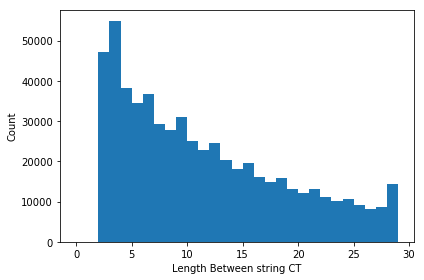

In [20]:
% matplotlib inline

## Ex. 8.3C
import matplotlib.pyplot as plt
#y = np.histogram(all_diffs, range(0,30))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(all_diffs,bins=range(0,30))
ax.set_xlabel("Length Between string CT")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()